In [1]:
from random import randrange
from time import time
import matplotlib.pyplot as plt

# Insertion Sort

In [2]:
def insertion_sort(A):
    A = A.copy()
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i -= 1
            
        A[i+1] = key
        
    return A

# Merge Sort

In [3]:
def merge_sort(A, p, r):
    A = A.copy()
    if p < r:
        q = int((p+r)/2)
        A = merge_sort(A, p, q)
        A = merge_sort(A, q+1, r)
        A = merge(A, p, q, r)
    return A

def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    
    L = [0 for _ in range(n1+1)]
    R = [0 for _ in range(n2+1)]
    
    L[:-1] = A[p-1:p+n1-1]
    R[:-1] = A[q:q+n2]
    
    L[n1] = float('inf')
    R[n2] = float('inf')
    
    i = 0
    j = 0
    
    for k in range(p-1, r):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
    
    return A

In [4]:
A = [randrange(100) for _ in range(15)]

print('Input:')
print(A)

Input:
[28, 9, 40, 33, 6, 53, 57, 24, 34, 27, 20, 93, 93, 55, 52]


In [5]:
sorted_A = insertion_sort(A)

print('Sorted by insertion sort algorithm:')
print(sorted_A)

Sorted by insertion sort algorithm:
[6, 9, 20, 24, 27, 28, 33, 34, 40, 52, 53, 55, 57, 93, 93]


In [6]:
sorted_A = merge_sort(A, 1, len(A))

print('Sorted by merge sort algorithm:')
print(sorted_A)

Sorted by merge sort algorithm:
[6, 9, 20, 24, 27, 28, 33, 34, 40, 52, 53, 55, 57, 93, 93]


In [7]:
t_insertion = []
t_merge = []

n = [100*(n+1) for n in range(10)]

for i in range(10):
    A = [randrange(100) for _ in range(n[i])]
    
    t0 = time()
    sorted_A = insertion_sort(A)
    t_insertion.append((time()-t0)*1000)
    
    t0 = time()
    sorted_A = merge_sort(A, 1, len(A))
    t_merge.append((time()-t0)*1000)

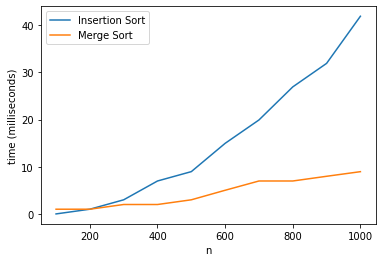

In [8]:
plt.plot(n, t_insertion, label='Insertion Sort')
plt.plot(n, t_merge, label='Merge Sort')
plt.xlabel('n')
plt.ylabel('time (milliseconds)')
plt.legend()
plt.show()